In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import json


In [5]:
# Dataset directory
dataset_dir = "garbage_dataset"

# Data generator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training data
train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data
val_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("✅ Classes found:", train_data.class_indices)

# Save class indices for later use
with open("class_indices.json", "w") as f:
    json.dump(train_data.class_indices, f)


Found 15813 images belonging to 10 classes.
Found 3949 images belonging to 10 classes.
✅ Classes found: {'battery': 0, 'biological': 1, 'cardboard': 2, 'clothes': 3, 'glass': 4, 'metal': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'trash': 9}


In [6]:
# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


C:\Users\manis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 485s 973ms/step - accuracy: 0.7042 - loss: 0.9428 - val_accuracy: 0.8455 - val_loss: 0.4887
Epoch 2/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 181s 366ms/step - accuracy: 0.8455 - loss: 0.4803 - val_accuracy: 0.8752 - val_loss: 0.3842
Epoch 3/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 179s 361ms/step - accuracy: 0.8702 - loss: 0.4002 - val_accuracy: 0.8812 - val_loss: 0.3574
Epoch 4/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 185s 374ms/step - accuracy: 0.8801 - loss: 0.3634 - val_accuracy: 0.8949 - val_loss: 0.3274
Epoch 5/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 175s 353ms/step - accuracy: 0.8857 - loss: 0.3456 - val_accuracy: 0.8969 - val_loss: 0.3205
Epoch 6/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 174s 352ms/step - accuracy: 0.8964 - loss: 0.3175 - val_accuracy: 0.8969 - val_loss: 0.3130
Epoch 7/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 174s 352ms/step - accuracy: 0.8985 - loss: 0.3038 - val_accuracy: 0.9025 - val_loss: 0.2930
Epoch 8/10
495/495 ━━━━━━━━━━━━━━━━━━━━ 180s 364ms/step - accuracy: 0.9027 -

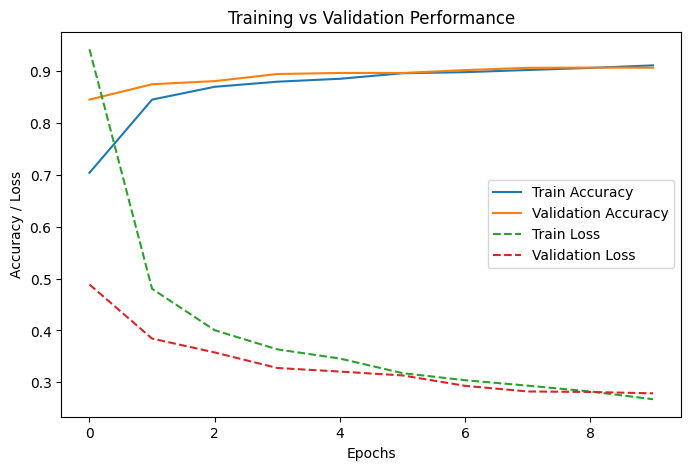

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title("Training vs Validation Performance")
plt.xlabel("Epochs")
plt.ylabel("Accuracy / Loss")
plt.legend()
plt.show()


In [9]:
model.save("waste_classifier_model.h5")
print("✅ Model saved successfully as waste_classifier_model.h5")


✅ Model saved successfully as waste_classifier_model.h5


In [10]:
import numpy as np
import json
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1️⃣ Load the saved model
model = load_model("waste_classifier_model.h5")

# 2️⃣ Load saved class labels
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)
class_labels = list(class_indices.keys())

# 3️⃣ Path to test image (use your correct path)
img_path = r"C:\Users\manis\Desktop\Study\Waste\shopping.webp"

# 4️⃣ Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# 5️⃣ Predict
predictions = model.predict(img_array)
pred_class = np.argmax(predictions)

print("🟢 Predicted Class:", class_labels[pred_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
🟢 Predicted Class: metal
